<a href="https://colab.research.google.com/github/josearangos/simulationUdeA/blob/master/Laboratorio_5_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 5 - Parte 2

### Máquinas de Vectores de Soporte

### 2019-I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Jose Alberto Arango Sánchez
#### Segundo Integrante: Leon Dario Arango Amaya

In [0]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio usaremos la regresión por vectores de soporte para resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality).

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [2]:
#cargamos la bd de entrenamiento
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print("Hay valores perdidos")
else:
    print("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [0]:
X = DataBase[:,0:12]

Y = DataBase[:,12]

In [4]:
X.shape, Y.shape

((8991, 12), (8991,))

Definimos la función

In [0]:
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape 

Complete el código siguiente para usar la regresión por vectores de suporte usando la librería sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [7]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time
tiempo_i = time.time()

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}

#Implemetamos la metodología de validación cross validation con 10 folds
Folds = 5
Errores = np.ones(Folds)
j = 0
kf = KFold(n_splits=Folds)
vectorSupport = np.ones(Folds)
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  
    
     #Normalizamos los datos
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Complete el código
    modelo = SVR(kernel='rbf',C=100,gamma = 1)
    
    
    # Entrenar el modelo
    modelo.fit(X_train,y_train)
    vectors = np.size(modelo.support_vectors_,0)
    vectorSupport[j] = vectors/len(X_train)
    # Validación del modelo
    ypred = modelo.predict(X_test)
 
    Errores[j] = MAPE(ypred, y_test)
    j+=1
    
print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print(" Porcentaje de Vectores de Soporte: " + str(np.mean(vectorSupport)))
print (("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)) + " segundos.")


Error de validación: 0.2259390395748797 +/- 0.11094914643434282
 Porcentaje de Vectores de Soporte: 0.21910801302774435


Tiempo total de ejecución: 8.645946979522705 segundos.


In [0]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time
tiempo_i = time.time()

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}

#Implemetamos la metodología de validación cross validation con 10 folds

Kernels = ['linear','linear','linear','linear','linear','linear','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']
Cs = [0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]
Gammas = ['auto','auto','auto','auto','auto','auto',0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1]

Mapes = []
Intervalos = []
VSupports = []

for i in range(len(Kernels)):
    
    Folds = 5
    Errores = np.ones(Folds)
    j = 0
    kf = KFold(n_splits=Folds)
    vectorSupport = np.ones(Folds)
    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]  

         #Normalizamos los datos
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        #Complete el código
        modelo = SVR(kernel=Kernels[i],C=Cs[i],gamma = Gammas[i])


        # Entrenar el modelo
        modelo.fit(X_train,y_train)
        vectors = np.size(modelo.support_vectors_,0)
        vectorSupport[j] = vectors/len(X_train)
        # Validación del modelo
        ypred = modelo.predict(X_test)

        Errores[j] = MAPE(ypred, y_test)
        j+=1

    Mapes.append(np.mean(Errores))
    Intervalos.append(np.std(Errores))
    VSupports.append(np.mean(vectorSupport))
    print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
    print(" Porcentaje de Vectores de Soporte: " + str(np.mean(vectorSupport)))
    print (("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)) + " segundos.")


Error de validación: 0.21532161504323985 +/- 0.06460100562932213
 Porcentaje de Vectores de Soporte: 0.3786300277723352


Tiempo total de ejecución: 4.252761125564575 segundos.

Error de validación: 0.24490897173183038 +/- 0.0962859267563447
 Porcentaje de Vectores de Soporte: 0.37665612594249104


Tiempo total de ejecución: 9.478327751159668 segundos.

Error de validación: 0.27680077418621385 +/- 0.13461740462666608
 Porcentaje de Vectores de Soporte: 0.384970000032475


Tiempo total de ejecución: 21.01167631149292 segundos.

Error de validación: 0.2869582909645992 +/- 0.15071982828475336
 Porcentaje de Vectores de Soporte: 0.38622128608226974


Tiempo total de ejecución: 71.40761494636536 segundos.

Error de validación: 0.2866052170692736 +/- 0.1500497705716069
 Porcentaje de Vectores de Soporte: 0.38633249759104876


Tiempo total de ejecución: 434.2511146068573 segundos.

Error de validación: 0.28853639336068776 +/- 0.1531772568363643
 Porcentaje de Vectores de Soporte: 0.386304700

## Ejercicio 2

Una vez complete el código, realice las simulaciones necesarias para llenar la tabla siguiente:

In [0]:
#! pip install qgrid

In [0]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['lineal','lineal','lineal','lineal','lineal','lineal','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})
df_types["MAPE Promedio"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)
df_types["MAPE Promedio"] = Mapes
df_types["Intervalo de confianza"] =Intervalos
df_types["% de Vectores de Soporte"] =VSupports
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [0]:
qgrid_widget.get_changed_df()

MAPE Promedio  ...  % de Vectores de Soporte
Kernel C       gamma                 ...                          
lineal 0.001   0.00        0.215322  ...                  0.378630
       0.010   0.00        0.244909  ...                  0.376656
       0.100   0.00        0.276801  ...                  0.384970
       1.000   0.00        0.286958  ...                  0.386221
       10.000  0.00        0.286605  ...                  0.386332
       100.000 0.00        0.288536  ...                  0.386305
rbf    0.001   0.01        0.401492  ...                  0.747025
               0.10        0.328517  ...                  0.642560
               1.00        0.490525  ...                  0.769381
       0.010   0.01        0.183024  ...                  0.443388
               0.10        0.179283  ...                  0.278001
               1.00        0.390559  ...                  0.561563
       0.100   0.01        0.147499  ...                  0.190497
               0.10        0.149947  ...                  0.151763
               1.00        0.268583  ...                  0.269019
       1.000   0.01        0.204431  ...                  0.122039
               0.10        0.191668  ...                  0.165749
               1.00        0.237877  ...                  0.216689
       10.000  0.01        0.559006  ...                  0.163776
               0.10        0.180296  ...                  0.104410
               1.00        0.222613  ...                  0.213297
       100.000 0.01        0.690361  ...                  0.102103
               0.10        0.214146  ...                  0.104604
               1.00        0.225939  ...                  0.219108

[24 rows x 3 columns]

3.1 ¿Cuál es la finalidad de usar las funciones kernel en el modelo SVM?

**R//:** La finalidad de usar las funciones kernel en el modelo SVM 




La finalidad de usar funciones kernel en el modelo SVM es poder proyectar el espacio de características a un espacio con una dimensión mayor para hacer que una función lineal se aproxime más a los puntos.

3.2 ¿En este caso el porcentaje de vectores de soporte provee una información similar que en el problema de clasificación? Explique su respuesta.

R/:No

3.3 Realice una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

In [0]:
def implementationSVMRegresion(k='rbf',c=100,g = 1):
  tiempo_i = time.time()

  #Complete el código para crear el modelo SVM para regresión. 
  #Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}

  #Implemetamos la metodología de validación cross validation con 10 folds
  Folds = 5
  Errores = np.ones(Folds)
  j = 0
  kf = KFold(n_splits=Folds)
  vectorSupport = np.ones(Folds)
  for train_index, test_index in kf.split(X):

      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]  

       #Normalizamos los datos
      scaler = preprocessing.StandardScaler().fit(X_train)
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)

      #Complete el código
      modelo = SVR(kernel=k,C=c,gamma=g)


      # Entrenar el modelo
      modelo.fit(X_train,y_train)
      vectors = np.size(modelo.support_vectors_,0)
      vectorSupport[j] = vectors/len(X_train)
      # Validación del modelo
      ypred = modelo.predict(X_test)

      Errores[j] = MAPE(ypred, y_test)
      j+=1

  print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
  print(" Porcentaje de Vectores de Soporte: " + str(np.mean(vectorSupport)))
  print (("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)) + " segundos.")
  
  return ypred,y_test

 

In [18]:
#La combinación que menor error tiene es : kernel = 'rbf', gamma = 0.01 y C= 0.1 para un error de 0.147499	 

ypred,y_test = implementationSVMRegresion(k='rbf',c=0.1,g = 0.01)


Error de validación: 0.1474991396673567 +/- 0.03821109122787157
 Porcentaje de Vectores de Soporte: 0.19049660040575228


Tiempo total de ejecución: 4.012741565704346 segundos.


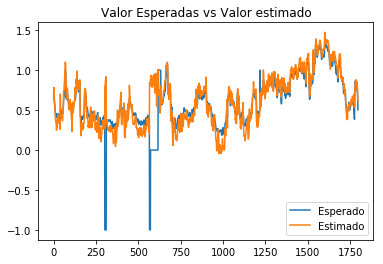

In [19]:
plt.title('Valor Esperadas vs Valor estimado')
plt.plot(y_test)
plt.plot(ypred)
plt.legend(['Esperado', 'Estimado'], loc=4)
plt.show()
